## Inference run on RapidSim Conditions

#### Unit/distribution check

In [11]:
import uproot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["axes.unicode_minus"] = False  

file = uproot.open('/users/zw21147/ResearchProject/datasets_mixed/full_mixed_Kee.root')
tree = file["DecayTree"] 
df = tree.arrays(library="pd")

file = uproot.open('/users/zw21147/ResearchProject/datasets/split/validation_renamed.root')
tree = file["DecayTree"] 
fulldf = tree.arrays(library="pd")

In [12]:
conditions = [
	"B_plus_P",
	"B_plus_PT",
 
	"angle_K_plus",
	"angle_e_plus",
	"angle_e_minus",
 
	"K_plus_FLIGHT",
	"e_plus_FLIGHT",
	"e_minus_FLIGHT",
 
	"K_plus_TRUEID",
	"e_plus_TRUEID",
	"e_minus_TRUEID",
 
 	"B_plus_vtxX_TRUE",
	"B_plus_vtxY_TRUE",
	"B_plus_vtxZ_TRUE",
 
	"K_plus_origX_TRUE",
	"K_plus_origY_TRUE",
	"K_plus_origZ_TRUE",
 
	"e_plus_origX_TRUE",
	"e_plus_origY_TRUE",
	"e_plus_origZ_TRUE",
 
	"e_minus_origX_TRUE",
	"e_minus_origY_TRUE",
	"e_minus_origZ_TRUE",
]


Missing branches: ['angle_K_plus', 'angle_e_plus', 'angle_e_minus', 'K_plus_FLIGHT', 'e_plus_FLIGHT', 'e_minus_FLIGHT', 'K_plus_TRUEID', 'e_plus_TRUEID', 'e_minus_TRUEID']


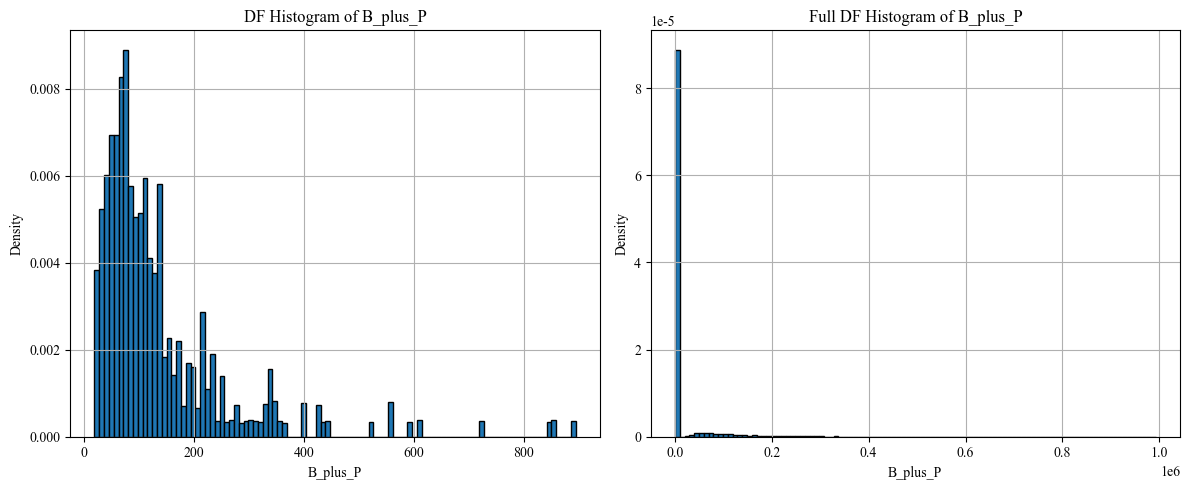

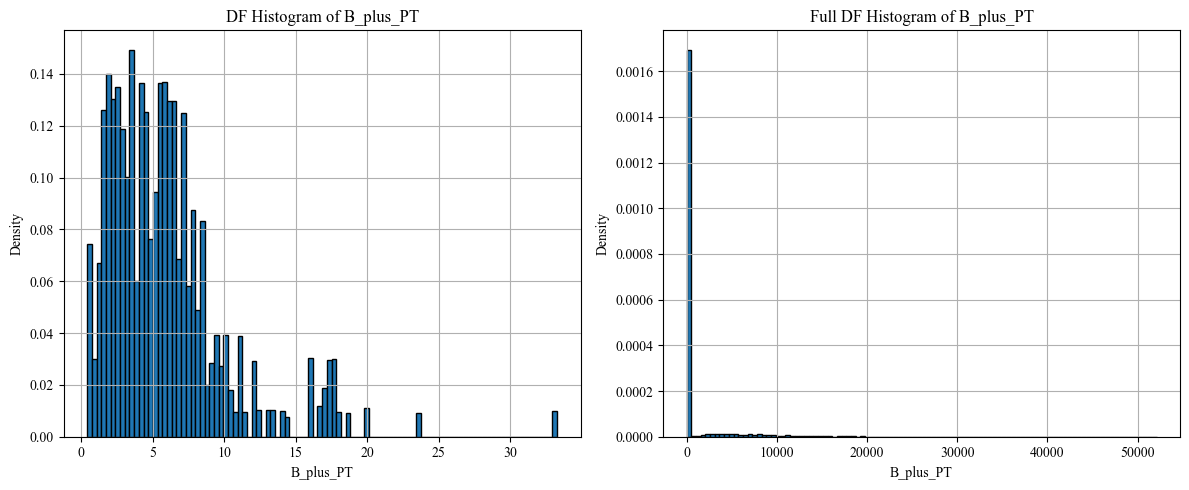

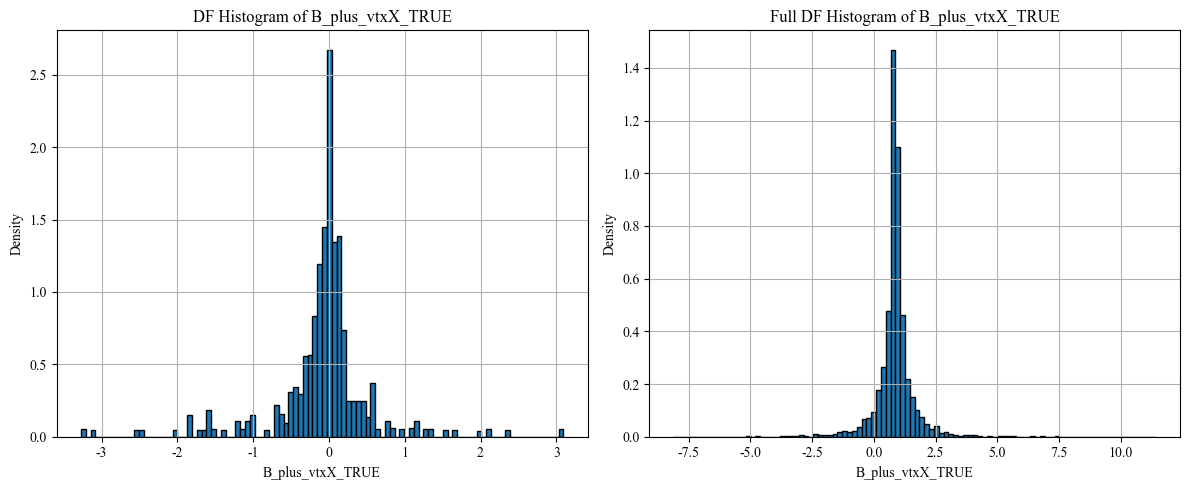

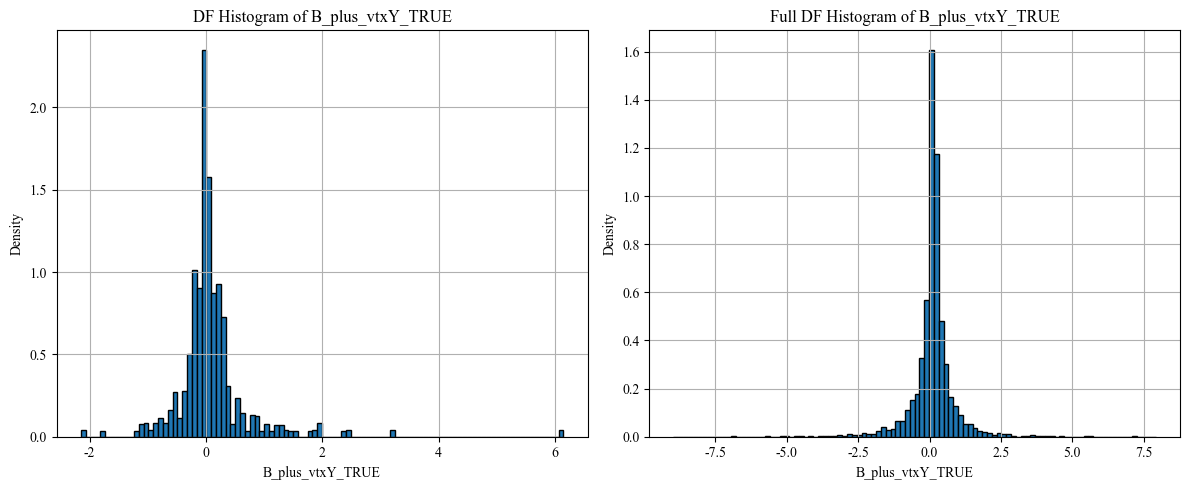

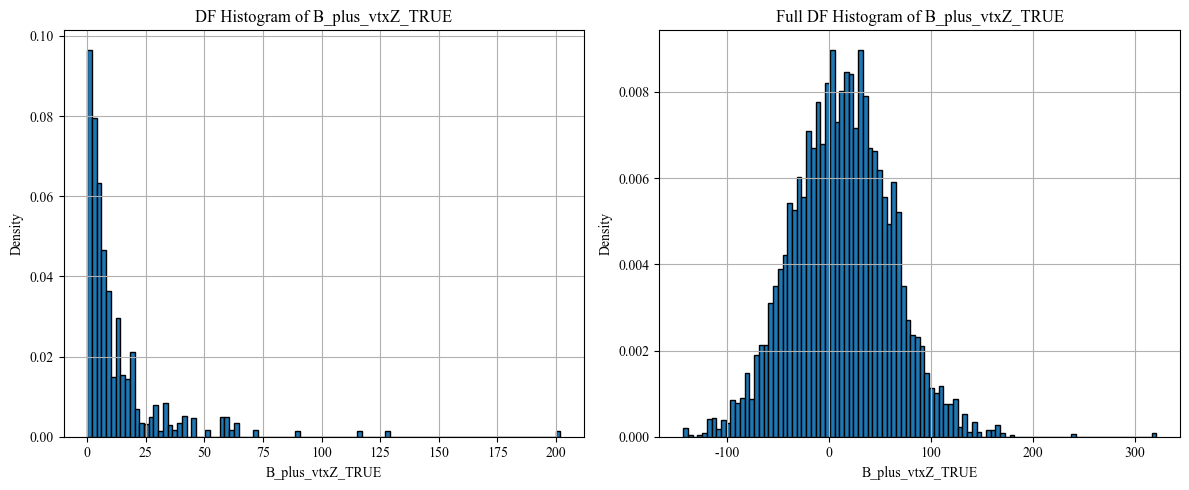

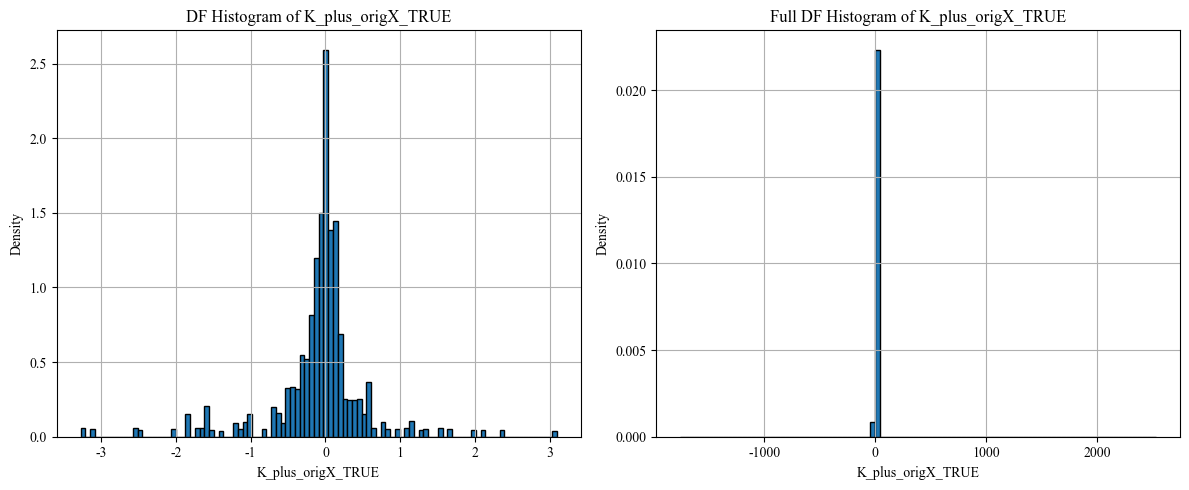

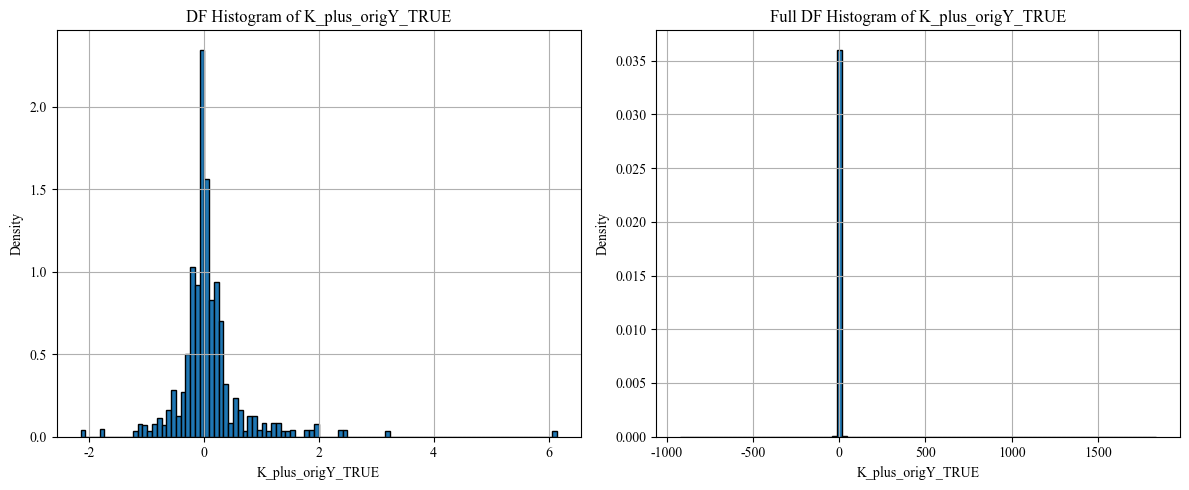

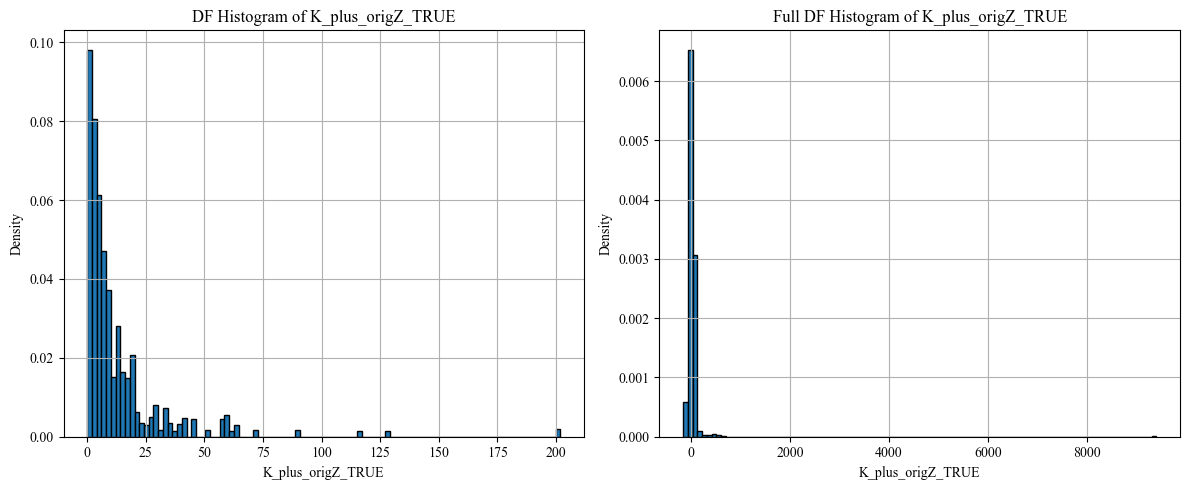

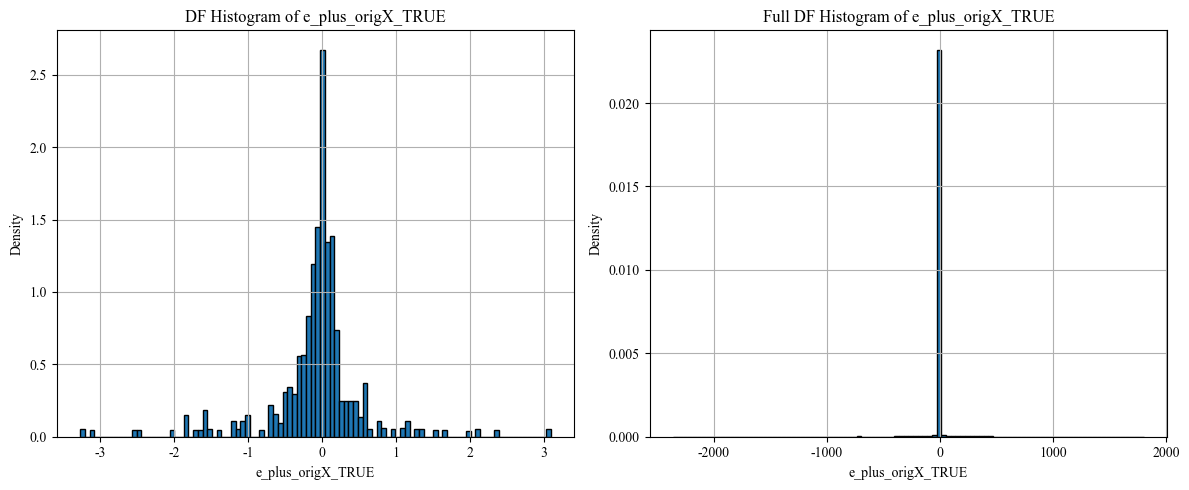

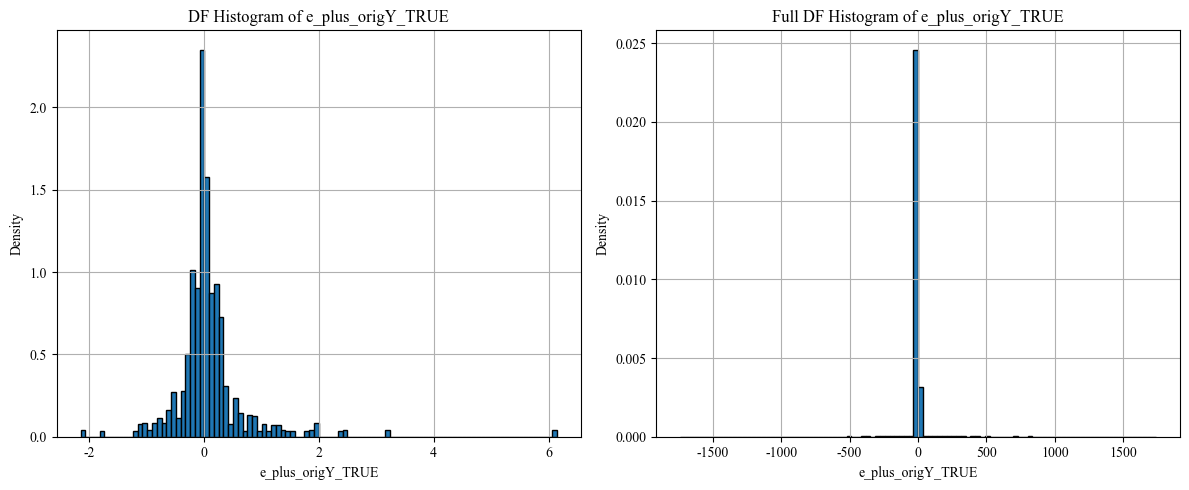

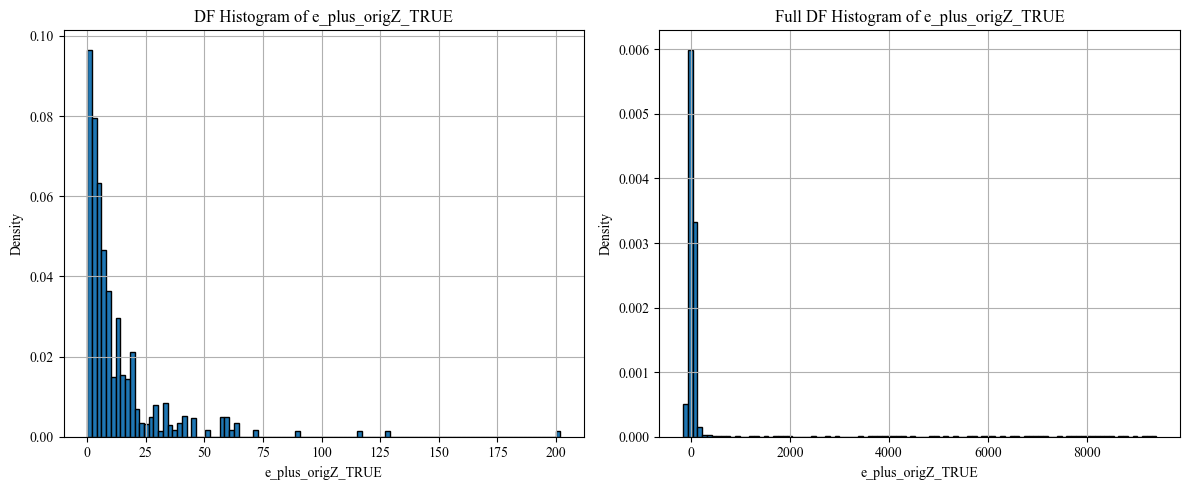

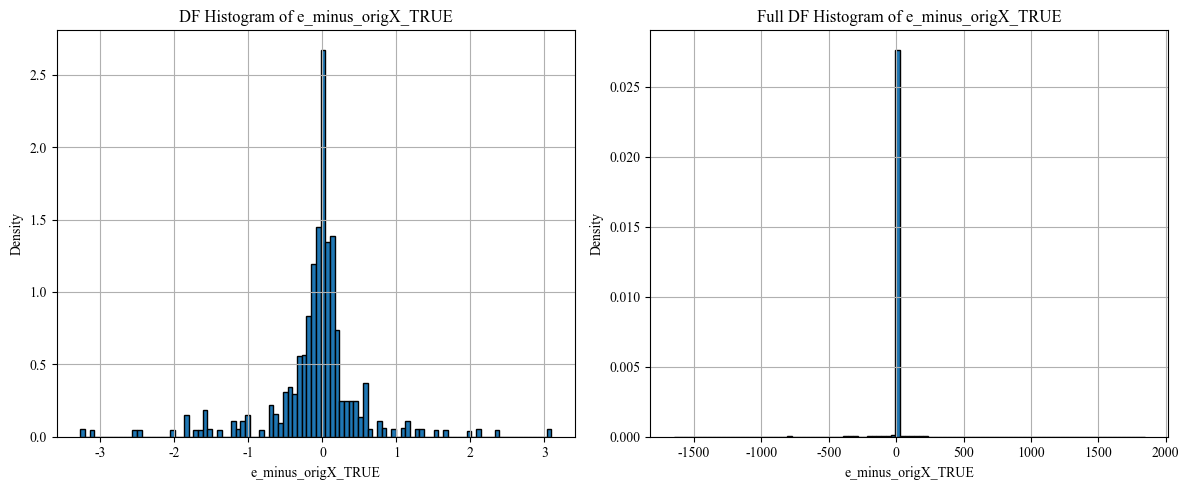

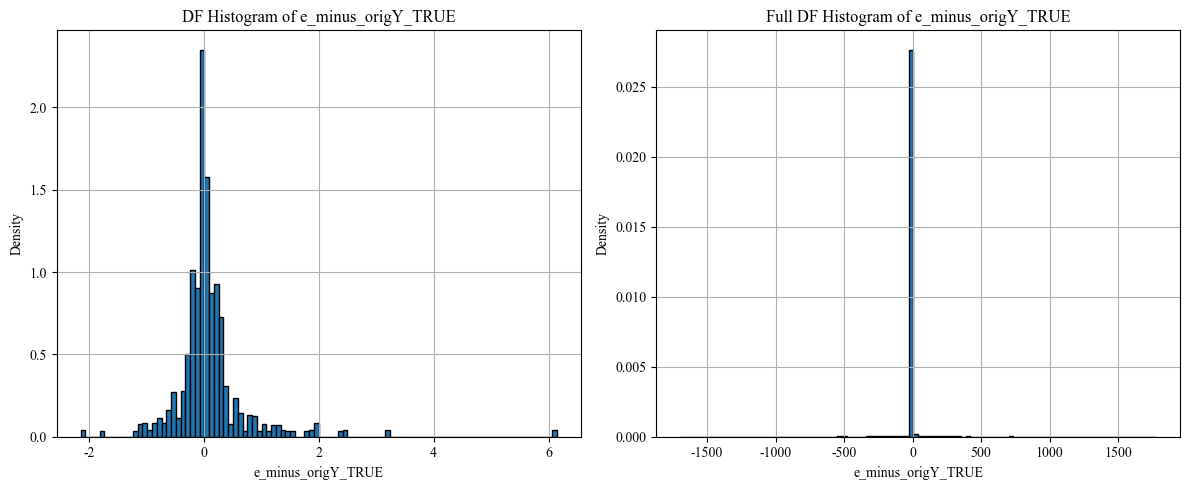

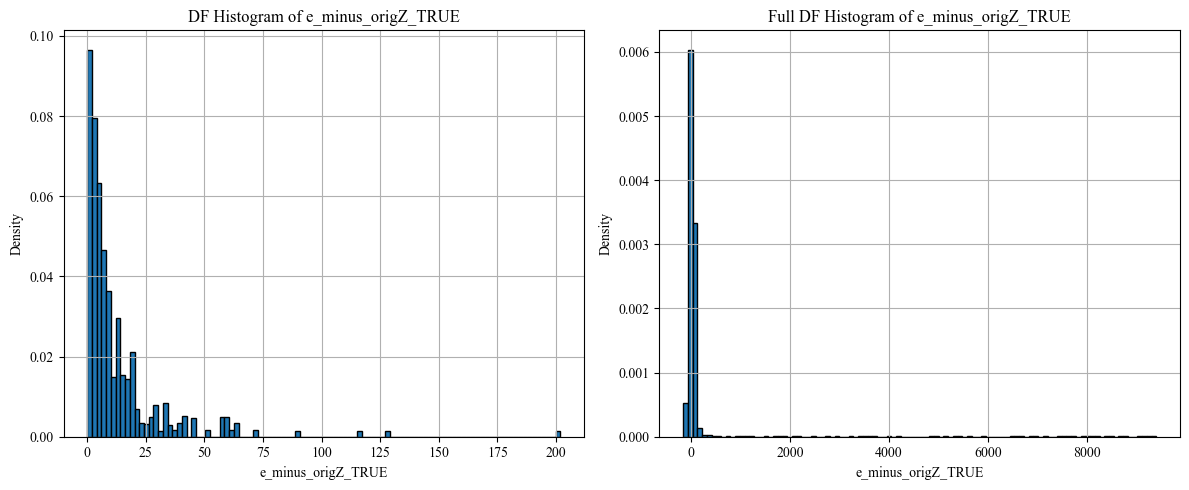

In [13]:
missing_branches = [col for col in conditions if col not in df.columns]
if missing_branches:
    print(f"Missing branches: {missing_branches}")

# Side by side
# Plot histograms for existing branches side by side
for col in conditions:
    if col in df.columns:
        plt.figure(figsize=(12, 5))
        
        # First subplot for df
        plt.subplot(1, 2, 1)
        df[col].hist(bins=100, density=True, edgecolor='black')
        plt.title(f'DF Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Density')
        
        # Second subplot for fulldf
        plt.subplot(1, 2, 2)
        fulldf[col].hist(bins=100, density=True, edgecolor='black')
        plt.title(f'Full DF Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Density')
        
        plt.tight_layout()
        plt.show()



In [14]:
df.loc[:, df.columns.str.contains('orig')] *= 100
df.loc[:, df.columns.str.contains('P')] *= 100


In [15]:
pdg_codes = {
    'K_plus_TRUEID': 321,  # PDG code for K+
    'e_plus_TRUEID': -11,  # PDG code for e+
    'e_minus_TRUEID': 11   # PDG code for e-
}

df['K_plus_TRUEID'] = pdg_codes['K_plus_TRUEID']
df['e_plus_TRUEID'] = pdg_codes['e_plus_TRUEID']
df['e_minus_TRUEID'] = pdg_codes['e_minus_TRUEID']

def compute_angle(px1, py1, pz1, px2, py2, pz2):
    dot_product = px1 * px2 + py1 * py2 + pz1 * pz2
    mag1 = np.sqrt(px1**2 + py1**2 + pz1**2)
    mag2 = np.sqrt(px2**2 + py2**2 + pz2**2)
    cos_theta = dot_product / (mag1 * mag2)
    return np.arccos(np.clip(cos_theta, -1.0, 1.0)) 

# Compute angles
df['angle_K_plus'] = compute_angle(df['B_plus_PX_TRUE'], df['B_plus_PY_TRUE'], df['B_plus_PZ_TRUE'],
                                   df['K_plus_PX_TRUE'], df['K_plus_PY_TRUE'], df['K_plus_PZ_TRUE'])

df['angle_e_plus'] = compute_angle(df['B_plus_PX_TRUE'], df['B_plus_PY_TRUE'], df['B_plus_PZ_TRUE'],
                                   df['e_plus_PX_TRUE'], df['e_plus_PY_TRUE'], df['e_plus_PZ_TRUE'])

df['angle_e_minus'] = compute_angle(df['B_plus_PX_TRUE'], df['B_plus_PY_TRUE'], df['B_plus_PZ_TRUE'],
                                    df['e_minus_PX_TRUE'], df['e_minus_PY_TRUE'], df['e_minus_PZ_TRUE'])

# Compute FLIGHT distances
df['K_plus_FLIGHT'] = np.sqrt(
    (df['B_plus_vtxX_TRUE'] - df['K_plus_origX_TRUE'])**2 +
    (df['B_plus_vtxY_TRUE'] - df['K_plus_origY_TRUE'])**2 +
    (df['B_plus_vtxZ_TRUE'] - df['K_plus_origZ_TRUE'])**2
)

df['e_plus_FLIGHT'] = np.sqrt(
    (df['B_plus_vtxX_TRUE'] - df['e_plus_origX_TRUE'])**2 +
    (df['B_plus_vtxY_TRUE'] - df['e_plus_origY_TRUE'])**2 +
    (df['B_plus_vtxZ_TRUE'] - df['e_plus_origZ_TRUE'])**2
)

df['e_minus_FLIGHT'] = np.sqrt(
    (df['B_plus_vtxX_TRUE'] - df['e_minus_origX_TRUE'])**2 +
    (df['B_plus_vtxY_TRUE'] - df['e_minus_origY_TRUE'])**2 +
    (df['B_plus_vtxZ_TRUE'] - df['e_minus_origZ_TRUE'])**2
)



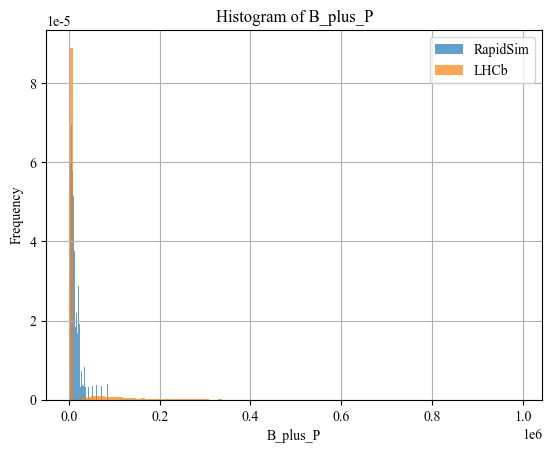

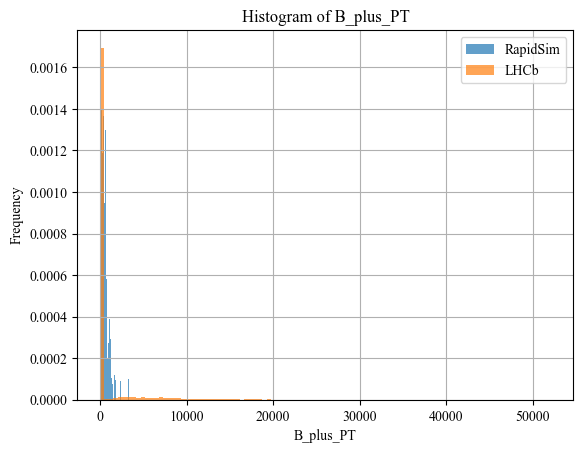

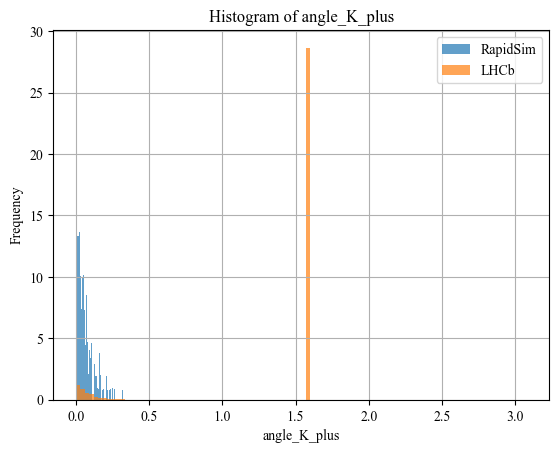

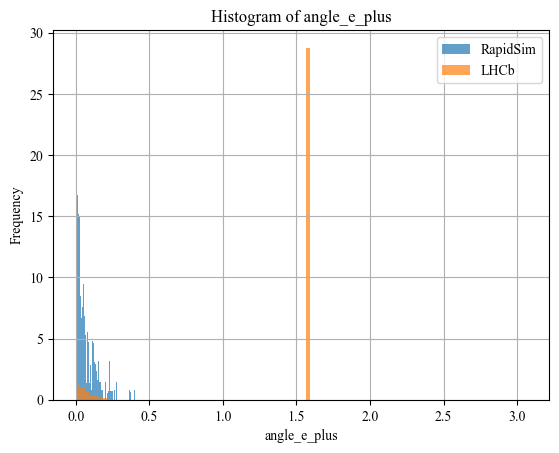

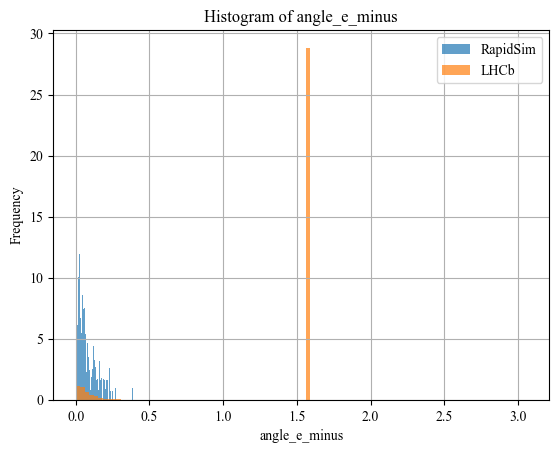

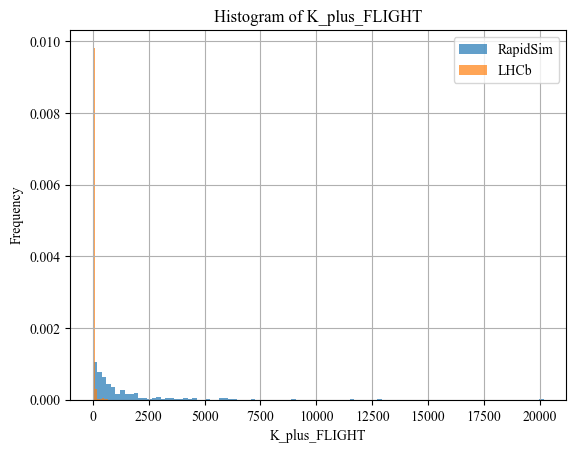

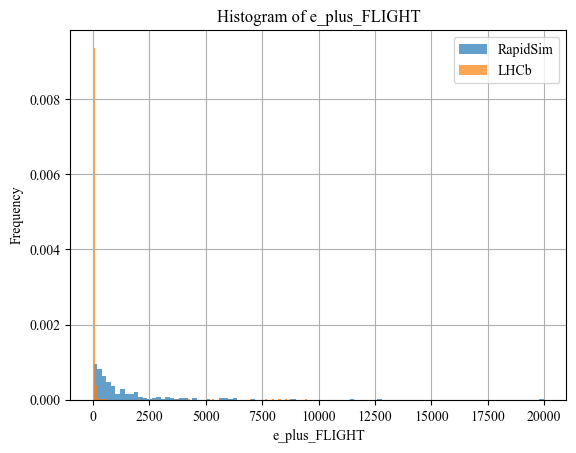

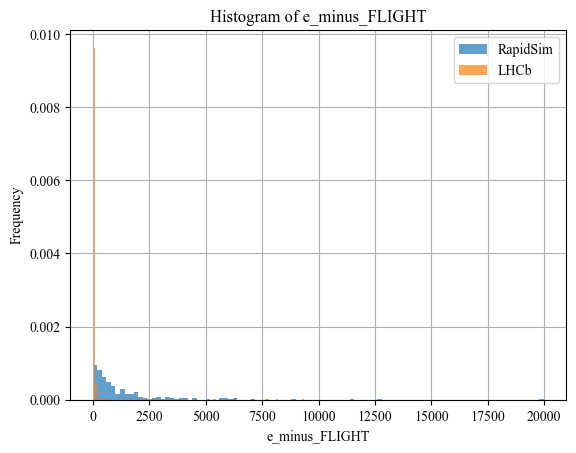

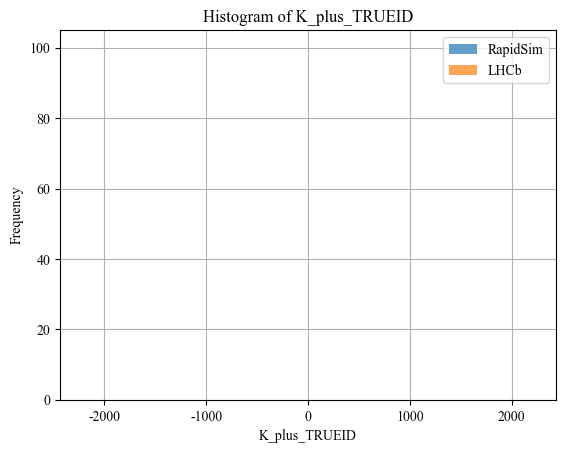

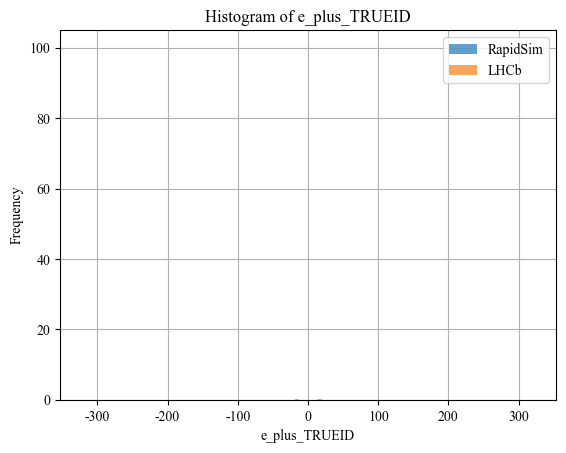

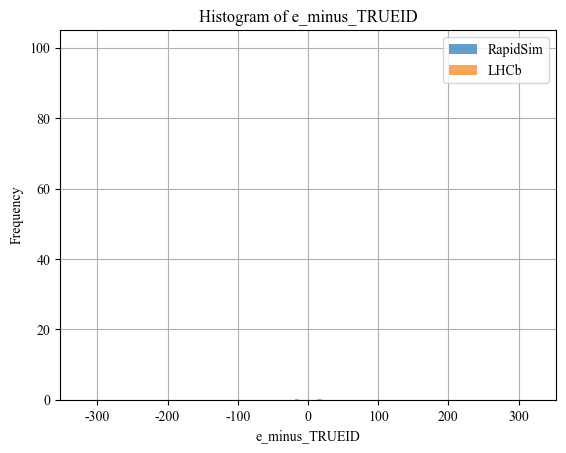

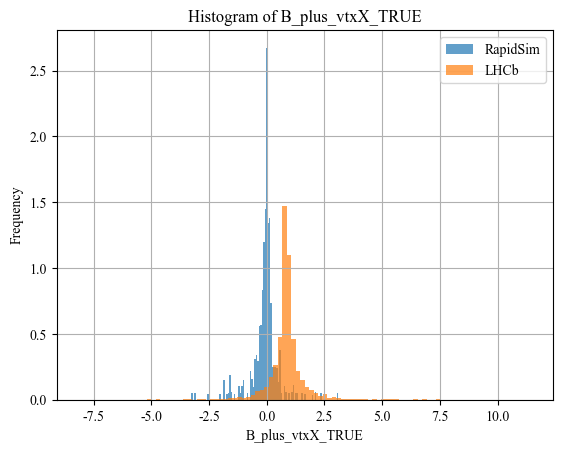

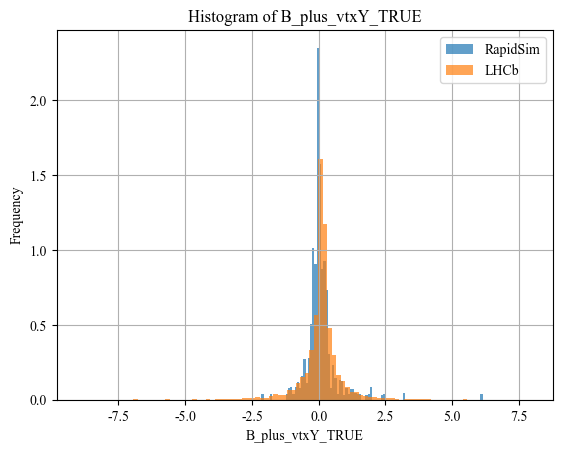

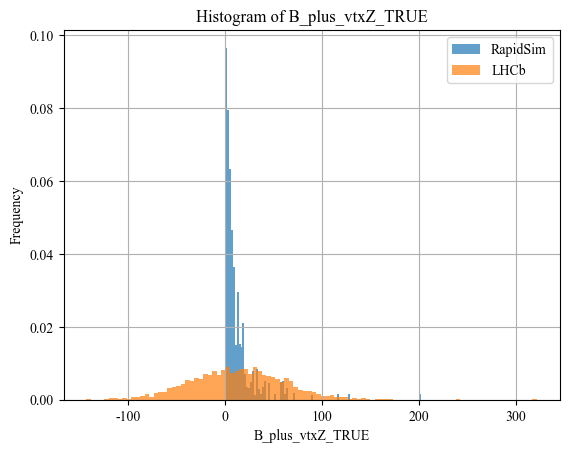

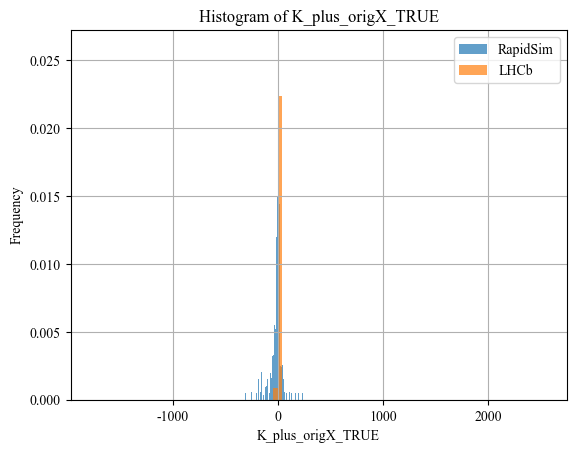

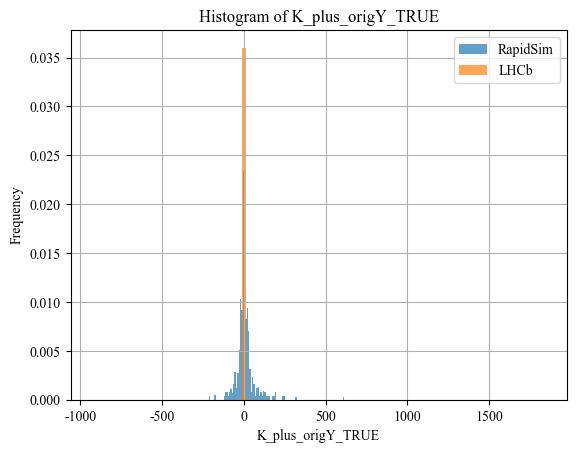

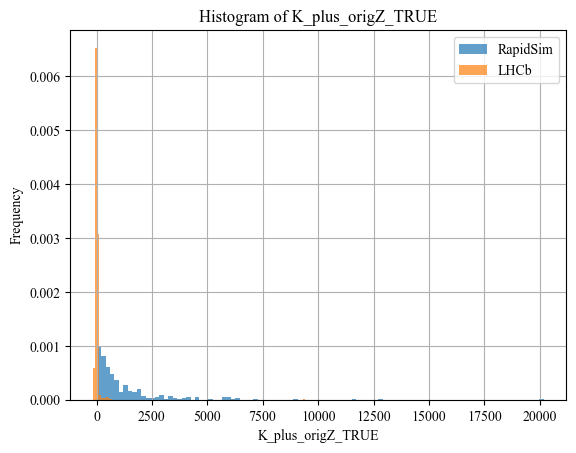

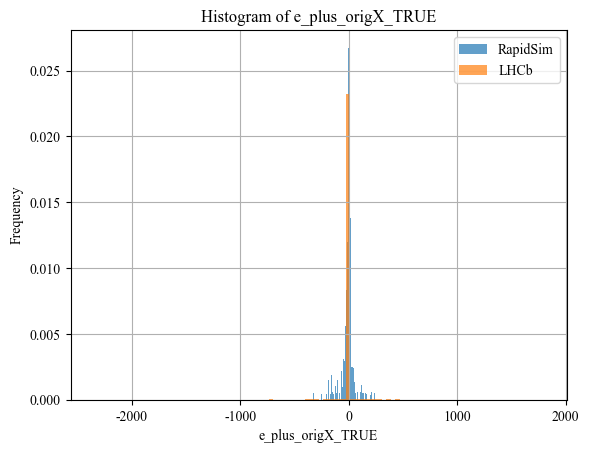

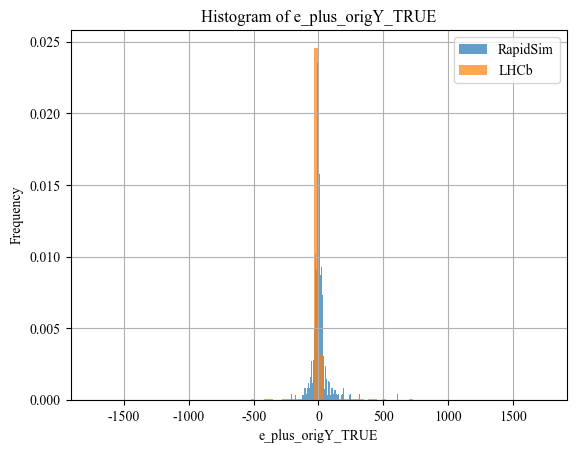

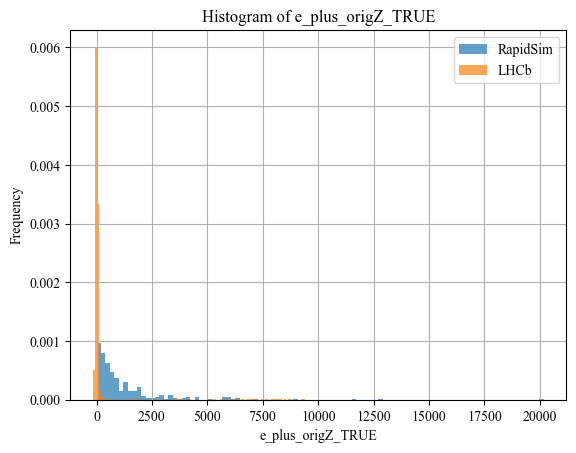

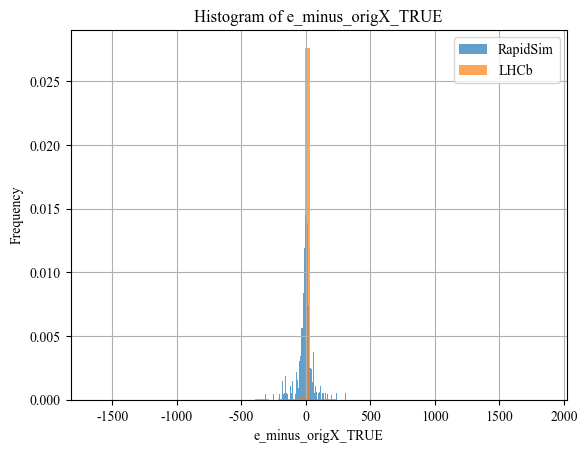

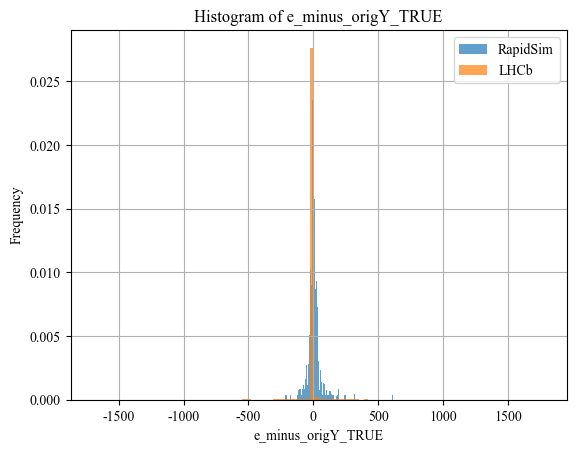

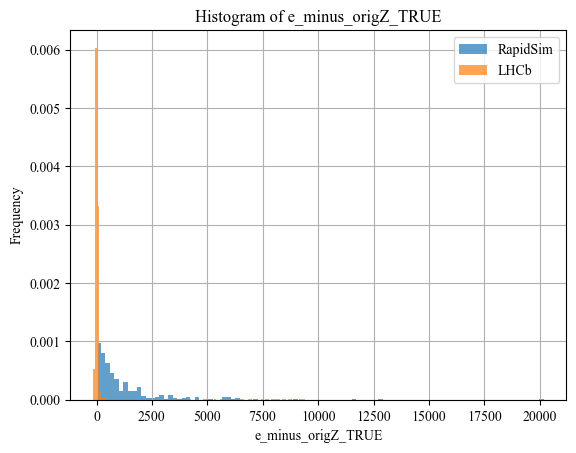

In [18]:
# Stacked
for col in conditions:
    if col in df.columns:
        plt.figure()
        df[col].hist(bins=100, density = True, alpha=0.7, label='RapidSim')
        fulldf[col].hist(bins=100, density = True, alpha=0.7, label='LHCb')
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.legend()
        plt.savefig(f'{col} Condition Comparison')
        plt.show()

In [ ]:
output_file = "RapidSimSample.root"
tree_name = "DecayTree"

data_dict = {col: df[col].to_numpy() for col in df.columns}

with uproot.recreate(output_file) as file:
    file[tree_name] = data_dict

print(f"DataFrame saved to {output_file} successfully")

DataFrame saved to RapidSimSample.root successfully
